In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import random
%matplotlib inline

# Switch x and y return

In [6]:
def midpoint_rev(p1,p2,d):
    assert len(p1) == len(p2), 'ERROR: The dimensions for p1 and p2 do not match'
    pr = []
    for i in range(len(p1)):
        pr.append(((p2[i] - p1[i])*d)+p1[i])
    return pr[1],pr[0]
        

In [13]:
def midpoint(p1,p2,d):
    assert len(p1) == len(p2), 'ERROR: The dimensions for p1 and p2 do not match'
    pr = []
    for i in range(len(p1)):
        pr.append(((p2[i] - p1[i])*d)+p1[i])
    return pr

In [14]:
def midpoint_old_rev(p1,p2,jump):
    x1 = (p1[0] + p2[0])/(1/jump)
    y1 = (p1[1] + p2[1])/(1/jump)
    return y1,x1

In [15]:
def midpoint_old(p1,p2,jump):
    x1 = (p1[0] + p2[0])/(1/jump)
    y1 = (p1[1] + p2[1])/(1/jump)
    return x1,y1

In [3]:
def deg2rad(deg):
    return deg*np.pi/180

In [4]:
def game(midpoint_func,initial_points,num_points,distance):
    current_point = [0,0]
    x_points = []
    y_points = []
    for i in range(num_points):
        current_point = midpoint_func(current_point,random.choice(initial_points),distance)
        x_points.append(current_point[0])
        y_points.append(current_point[1])
    return x_points,y_points

In [5]:
def plot2D(x,y,alpha,size,d,save=None):
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    ax.set_aspect('equal',adjustable='box')
    plt.scatter(x,y,alpha=alpha,s=size,c='blue')
    for i in ['top','left','bottom','right']:
        ax.spines[i].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.text(0.6,0.8,'d = {:#.3g}'.format(d),fontsize=20)
    if save != None:
        plt.savefig(save)
        plt.close()
    else:
        plt.show()

In [7]:
initial_points = [[0,1],
                  [np.cos(deg2rad(30)),-np.sin(deg2rad(30))],
                  [-np.cos(deg2rad(30)),-np.sin(deg2rad(30))]]


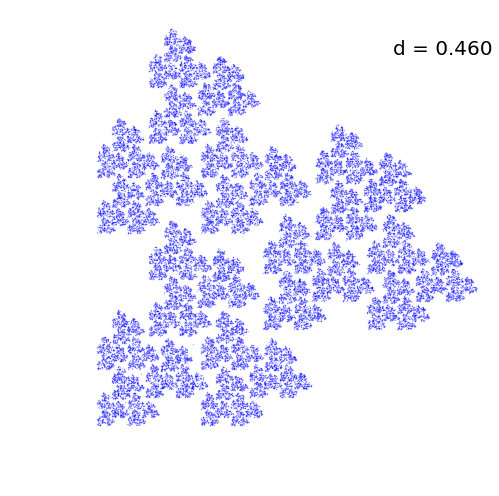

In [9]:
d = 0.46
x_points,y_points = game(midpoint,initial_points,50000,d)
plot2D(x_points,y_points,0.4,0.1,round(d,3))

# Square normal

In [10]:
initial_points = [[-1,-1],[-1,1],[1,1],[1,-1]]

In [11]:
def game_square(midpoint_func,initial_points,num_points,distance):
    current_point = [0,0]
    x_points = []
    y_points = []
    last_vertex = None
    for i in range(num_points):
        allowed_vertices = [i for i in initial_points if i != last_vertex]
        last_vertex = random.choice(allowed_vertices)
        current_point = midpoint_func(current_point,last_vertex,distance)
        x_points.append(current_point[0])
        y_points.append(current_point[1])
    return x_points,y_points

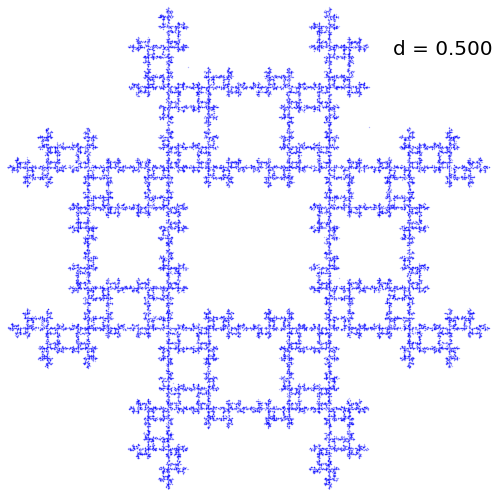

In [16]:
d = 0.5
x_points,y_points = game_square(midpoint,initial_points,50000,d)
plot2D(x_points,y_points,0.4,0.1,round(d,3))

# Square tilted

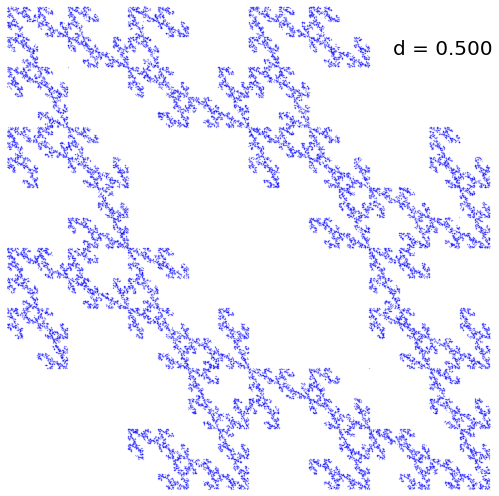

In [18]:
d = 0.5
x_points,y_points = game_square(midpoint_old_rev,initial_points,50000,d)
plot2D(x_points,y_points,0.4,0.1,round(d,3))

# Triangle - square rule

In [19]:
initial_points = [[0,1],
                  [np.cos(deg2rad(30)),-np.sin(deg2rad(30))],
                  [-np.cos(deg2rad(30)),-np.sin(deg2rad(30))]]


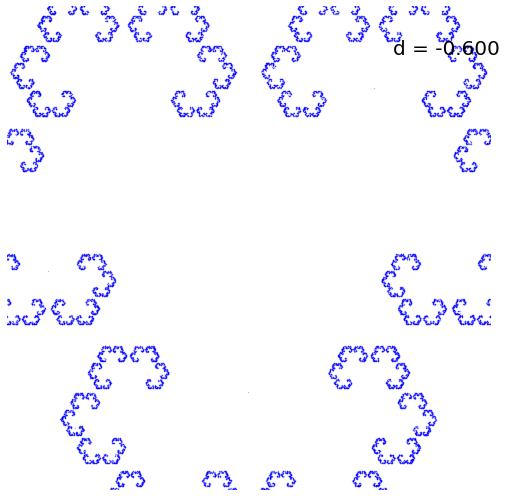

In [33]:
d = -0.6
x_points,y_points = game_square(midpoint_old,initial_points,50000,d)
plot2D(x_points,y_points,0.4,0.1,round(d,3))

In [26]:
initial_points = [[0,1],
                  [np.cos(deg2rad(30)),-np.sin(deg2rad(30))],
                  [-np.cos(deg2rad(30)),-np.sin(deg2rad(30))]]


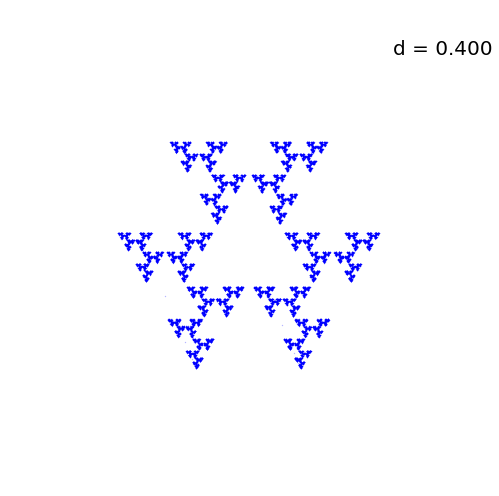

In [28]:
d = 0.4
x_points,y_points = game_square(midpoint,initial_points,50000,d)
plot2D(x_points,y_points,0.4,0.1,round(d,3))